# toy problem 4a

Using lorenze equation for small



## Generate data

train_data size (100,500,128,128)

validation size (10,500,128,128)

test size (10,500,128,128)

In [6]:
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy
from scipy import integrate

In [70]:
x_list = np.linspace(-10,10,64)
y_list = np.linspace(-10,10,64)
z = np.random.uniform(-10, 10, 40)

# paths
data_dir = '../data/toy4a'
result_dir = '../result/toy4a'

In [81]:
sigma = 10
rho = 28
beta = 8/3

# adjustable parameters
dt = 0.01       # set to 5e-4 for Lorenz
noise = 0.      # for study of noisy measurements, we use noise=0.01, 0.02; otherwise we leave it as 0.
n_forward = 5
total_steps = 500

# dataset 
n_train = 1
n_val = 10

train_data = np.zeros((n_train,total_steps+1,len(x_list),len(y_list)))
val_data = np.zeros((n_val,total_steps+1,len(x_list),len(y_list)))

t = np.linspace(0, (total_steps)*dt, total_steps+1)
    
def lorenz_rhs(x):
    return np.array([sigma*(x[1]-x[0]), x[0]*(rho-x[2])-x[1], x[0]*x[1]-beta*x[2]])

# simulation parameters
np.random.seed(2)
warmup = 500
n = 3



# simulate training trials 
pre_t = np.linspace(0, warmup*dt, warmup+1)

for n in tqdm(range(n_train)):
    for i, x in tqdm(enumerate(x_list)):
        for j, y in enumerate(y_list):

            x_init = np.array([x,y,z[n]])
            sol = scipy.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [0, warmup*dt], x_init, t_eval=pre_t)
    #         for i in tqdm(range(n_train)):
            x_init = sol.y[:, -1].T
            sol = scipy.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [0, total_steps*dt], x_init, t_eval=t)
    #         print(sol.y[2].T.shape)
    #         print(train_data[i, j, :].shape)
            train_data[n,:,i, j] = sol.y[2].T


  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [82]:
np.save(os.path.join(data_dir, 'train_data_short'), train_data)

(1, 501, 64, 64)
30.45611895563539
23.422850569187837


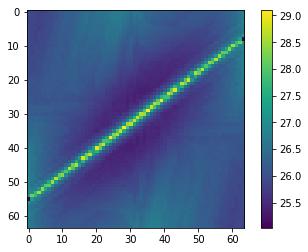

In [84]:
print(train_data.shape)
print(np.max(train_data))
print(np.min(train_data))
# plt.plot(train_data[5,3,:])
plt.imshow(train_data[0,0])
plt.colorbar()

In [7]:

# define two modes
def u(x, y, t):
    muu = 128/2
    sigma = 30
    return (1/(np.sqrt(2*np.pi*sigma)) * np.exp(-((x-muu)**2 + (y-muu)**2)/(2*sigma**2)))*np.cos(w0*t)
#     return 1./np.cosh((x-muu)/sigma)/np.cosh((y-muu)/sigma)*np.cos(w0*t)

# system

    
def lorenz(x,y,z):
    sigma = 1
    
    
# def v(x,y):
#     muu = 128/4
#     sigma = 5
#     dst = np.sqrt(x*x+y*y)
#     gauss = np.exp(-( (dst-muu)**2 / ( 2.0 * sigma**2 ) ) )
#     return gauss

def make_data(n_points, file_name, data_dir = './data/toy3a', n_time_steps = 500, dim = 128, num_periods_big = 8, w0=0.5, w1=1.0, width_small = 64):
    """
    Makes data for toy2c
    
    Inputs:
    n_points: int, how many data points 
    file_name: str, name of file to save
    data_dir = './data/toy2': str, directory of where to store
    n_time_steps = 500: int, how many time steps per data point
    dim = 128: int, how many data points per dim, while be same in both x and y directions
    num_periods_big = 8: int, how many periods of the slow scale
    w0 = 0.5: float, frequency of slow scale
    w1 = 1.0: float, frequency of fast scale
    width_small = 8: width of small (fast) scale
    
    Output: 
    data: size (n_points,n_time_steps,dim, dim) will be returned and saved to file data_dir+file_name
    
    """
    print(width_small)
    print("Making data")
    x = np.arange(dim)
    y = np.arange(dim)
    data = np.zeros((n_points, n_time_steps, dim, dim))

    for i in tqdm(range(n_points)):
        t_start = np.random.uniform(high=4*np.pi)
        t = np.linspace(t_start, num_periods_big*4*np.pi + t_start, n_time_steps)


        xgrid, ygrid, tgrid = np.meshgrid(x, y, t)
        
        Phi = u(xgrid, ygrid, tgrid) + v(xgrid, ygrid, tgrid)
        

#         Phi = np.cos(w0*tgrid)

#         Phi[1:3, 0:2,:] = np.cos(w1*tgrid[1:3, 0:2,:]+np.pi/4)
        scaled_Phi = (Phi.T - Phi.min()) / (Phi.max() - Phi.min())
#         print("scaled_Phi shape = ", scaled_Phi.shape)
#         plt.imshow(scaled_Phi[0])
#         plt.colorbar()
#         plt.show()
#         hji
        data[i] = scaled_Phi

    print("making done, saving to ", os.path.join(data_dir, file_name))
    np.save(os.path.join(data_dir, file_name), data)
    print("done")
    
    return data

2
Making data


  0%|          | 0/100 [00:00<?, ?it/s]

making done, saving to  ../data/toy3a/train_data.npy
done
(100, 500, 128, 128)


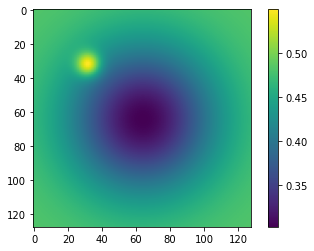

2
Making data


  0%|          | 0/10 [00:00<?, ?it/s]

making done, saving to  ../data/toy3a/val_data.npy
done
2
Making data


  0%|          | 0/10 [00:00<?, ?it/s]

making done, saving to  ../data/toy3a/test_data.npy
done


In [8]:
n_train_points = 100
n_val_points = 10
n_test_points = 10
n_time_steps = 500
dim = 128
width_small = 2#int(dim/2)

# params
w0 = 0.5
w1 = 1.0
# width_small = 8
num_periods_big = 8


# paths
data_dir = '../data/toy3a'
result_dir = '../result/toy3a'


x = np.arange(dim)
y = np.arange(dim)
train_data = make_data(n_train_points, 'train_data.npy', data_dir = data_dir,width_small=width_small,dim=dim) 
print(train_data.shape)
plt.imshow(train_data[0,0])
plt.colorbar()
plt.show()
val_data = make_data(n_val_points, 'val_data.npy', data_dir = data_dir,width_small=width_small,dim=dim) 
test_data = make_data(n_test_points, 'test_data.npy', data_dir=data_dir,width_small=width_small,dim=dim) 



In [ ]:
print(train_data.shape)
plt.imshow(train_data[2,0])
plt.colorbar()

In [ ]:
print(train_data.shape)
mean_to_plot = np.mean(train_data[0], axis = (1,2)) 
# mean_to_plot = np.mean(train_data[0,:, :64,:64], axis = (1,2))
print(mean_to_plot.shape)
plt.plot(mean_to_plot)

# mean_to_plot = np.mean(train_data[0], axis = (1,2))
mean_to_plot = np.mean(train_data[0,:, :64,:64], axis = (1,2))
print(mean_to_plot.shape)
plt.plot(mean_to_plot)

# # mean_to_plot = np.mean(train_data[0], axis = (1,2))
# mean_to_plot = np.mean(train_data[0,:, :32,:32], axis = (1,2))
# print(mean_to_plot.shape)
# plt.plot(mean_to_plot)

In [77]:
def animate(snapshots, normalize = True, file_name = "animation.gif"):
    """
    Makes an animation of snapshots in time
    
    inputs:
    snapshots: np.array of size (n_time_steps,1, dim, dim)
    normalize = True: whether to fix axis between 0 and 1 or not
    file_name = "animation.gif": file name of where to save gif
    
    outputs:
    no returned output
    gif saved to file_name
    """


    fps = 30
    nSeconds = len(snapshots)/fps
    
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure( figsize=(8,8) )

    a = snapshots[0,:,:,:][0].T
    if normalize:
        im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0.0, vmax=1.0)
    else:
        im = plt.imshow(a, interpolation='none', aspect='auto', vmin=np.min(snapshots), vmax=np.max(snapshots))
    plt.colorbar()

    print("Animating, may take a little while...")

    def animate_func(i):
        if i % fps == 0:
            print( '.', end ='' )

        im.set_array(snapshots[i,:,:,:,][0].T)
        return [im]

    anim = animation.FuncAnimation(
                                   fig,
                                   animate_func,
                                   frames = int(nSeconds * fps),
                                   interval = 1000 / fps, # in ms
                                   )
    writergif = animation.PillowWriter(fps=30)
    anim.save(file_name, writer=writergif)

    print('Done! gif saved to ', file_name)


Animating, may take a little while...
..

IndexError: list index out of range

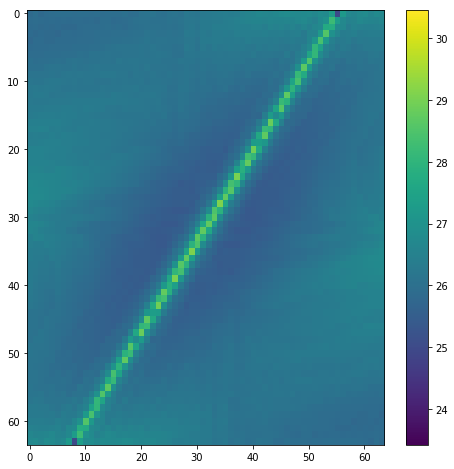

In [80]:
animate(train_data[0].reshape(total_steps+1,1,len(x_list),len(y_list)), normalize=False, file_name = os.path.join(result_dir,'train_data.gif'))